# Analyzing Employee Attrition Patterns

In [79]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Downloads/15-employee_attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [7]:
sns.set_style("whitegrid")

In [10]:
pd.set_option("display.max_columns",None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
df_2=df.drop(columns=["DailyRate","EmployeeCount","HourlyRate","JobInvolvement","MonthlyRate","StockOptionLevel","TrainingTimesLastYear","BusinessTravel"])

In [20]:
df_2

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,8,1,6,4,0,5,41-50
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,Research Scientist,2,Married,5130,1,No,23,4,4,10,3,10,7,1,7,41-50
2,37,Yes,Research & Development,2,2,Other,4,4,Male,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,7,3,0,0,0,0,31-40
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,8,3,8,7,3,0,31-40
4,27,No,Research & Development,2,1,Medical,7,1,Male,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,6,3,2,2,2,2,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,2061,3,Male,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,17,3,5,2,0,3,31-40
1466,39,No,Research & Development,6,1,Medical,2062,4,Male,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,9,3,7,7,1,7,31-40
1467,27,No,Research & Development,4,3,Life Sciences,2064,2,Male,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,6,3,6,2,0,3,18-30
1468,49,No,Sales,2,3,Medical,2065,4,Male,2,Sales Executive,2,Married,5390,2,No,14,3,4,17,2,9,6,0,8,41-50


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   Department                1470 non-null   object  
 3   DistanceFromHome          1470 non-null   int64   
 4   Education                 1470 non-null   int64   
 5   EducationField            1470 non-null   object  
 6   EmployeeNumber            1470 non-null   int64   
 7   EnvironmentSatisfaction   1470 non-null   int64   
 8   Gender                    1470 non-null   object  
 9   JobLevel                  1470 non-null   int64   
 10  JobRole                   1470 non-null   object  
 11  JobSatisfaction           1470 non-null   int64   
 12  MaritalStatus             1470 non-null   object  
 13  MonthlyIncome             1470 non-null   int64 

In [24]:
df_2.nunique()

Age                           43
Attrition                      2
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
TotalWorkingYears             40
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
AgeGroup                       4
dtype: int64

In [95]:
warnings.filterwarnings("ignore", category=FutureWarning)

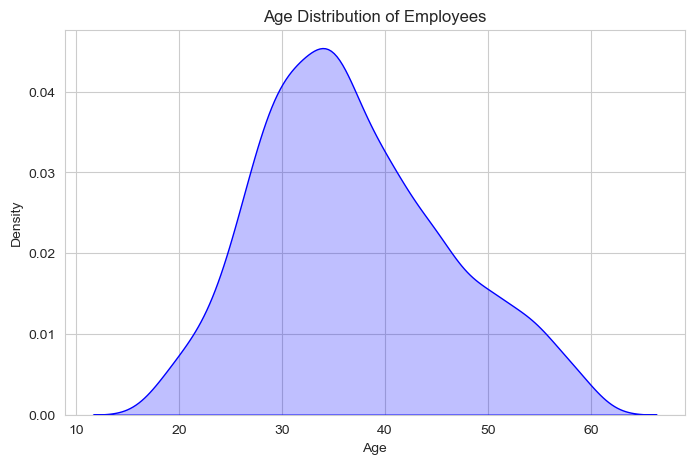

In [96]:
# Task 1: Age Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df_2['Age'], shade=True, color='blue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

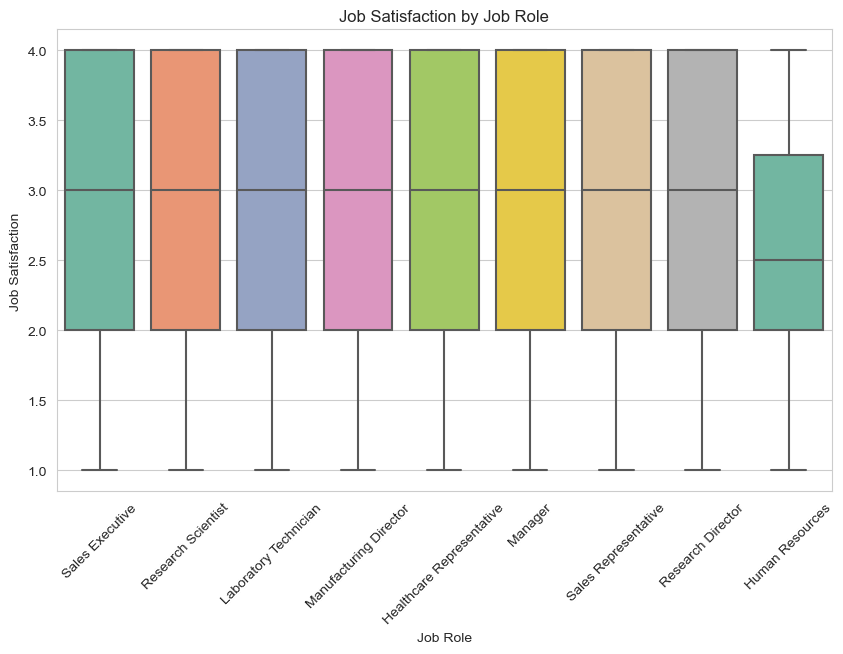

In [99]:
# Task 2: Job Satisfaction by Job Role
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='JobSatisfaction', data=df_2, palette='Set2')
plt.title('Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

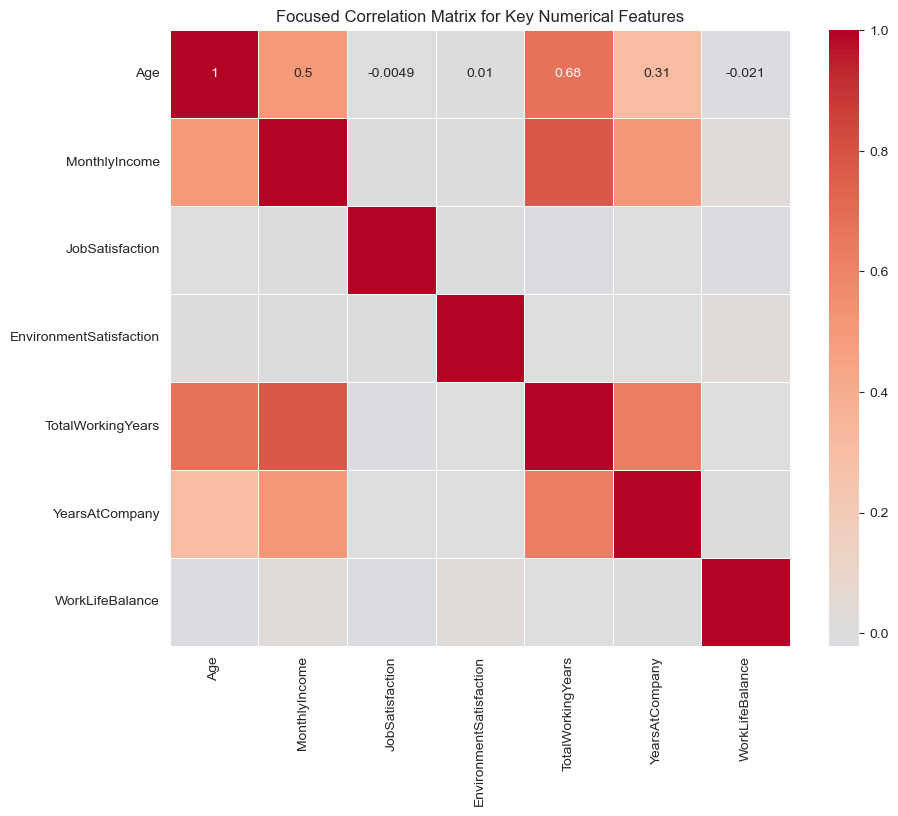

In [140]:
# Task 3:  Correlation Heatmap

selected_numerical_columns = ['Age', 'MonthlyIncome', 'JobSatisfaction', 
                              'EnvironmentSatisfaction', 'TotalWorkingYears', 
                              'YearsAtCompany', 'WorkLifeBalance']


correlation_matrix_selected = df_2[selected_numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Focused Correlation Matrix for Key Numerical Features')
plt.show()

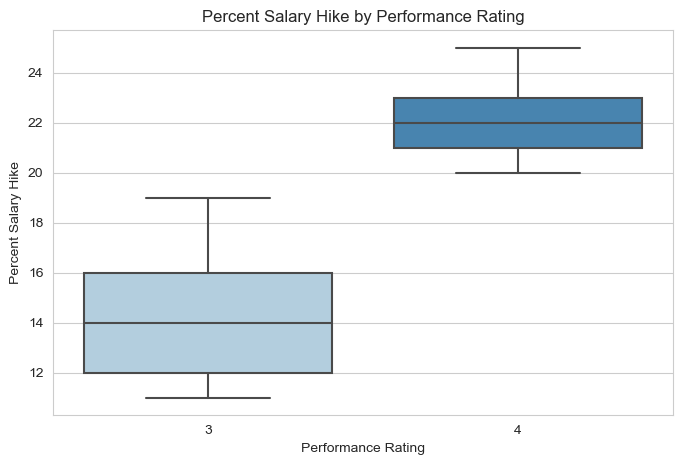

In [142]:
# Task 4: Percent Salary Hike by Performance Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='PercentSalaryHike', data=df_2, palette='Blues')
plt.title('Percent Salary Hike by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Salary Hike')
plt.show()

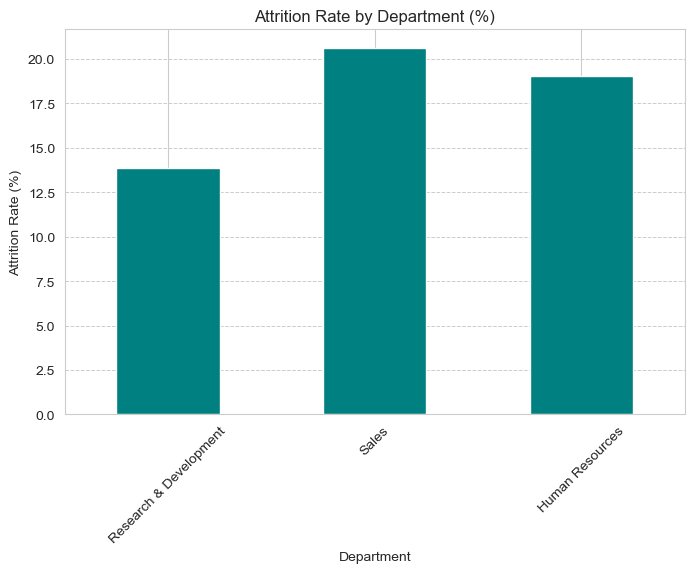

In [101]:
# Task 5: Attrition Rate by Department 
total_employees_per_department = df_2['Department'].value_counts()
attrition_counts_per_department = df_2[df['Attrition'] == 'Yes']['Department'].value_counts()
attrition_rate_per_department = (attrition_counts_per_department / total_employees_per_department) * 100


plt.figure(figsize=(8, 5))
attrition_rate_per_department.plot(kind='bar', color='teal')
plt.title('Attrition Rate by Department (%)')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

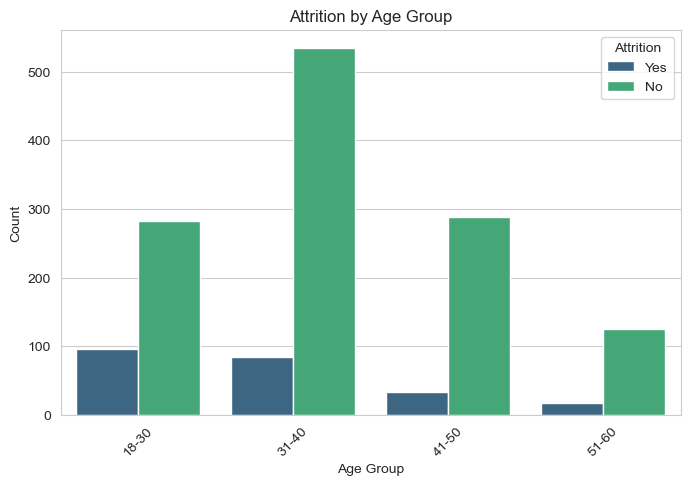

In [110]:
# Task 6: Attrition by Age Group
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Attrition', data=df_2, palette='viridis')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

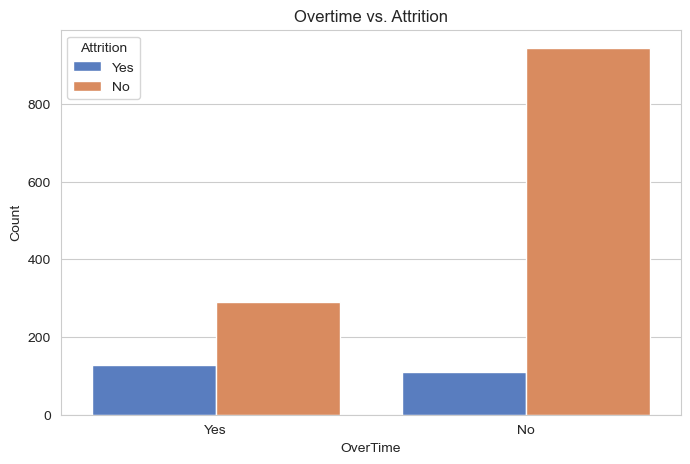

In [141]:
# Task 7: Overtime vs. Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', hue='Attrition', data=df_2, palette='muted')
plt.title('Overtime vs. Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

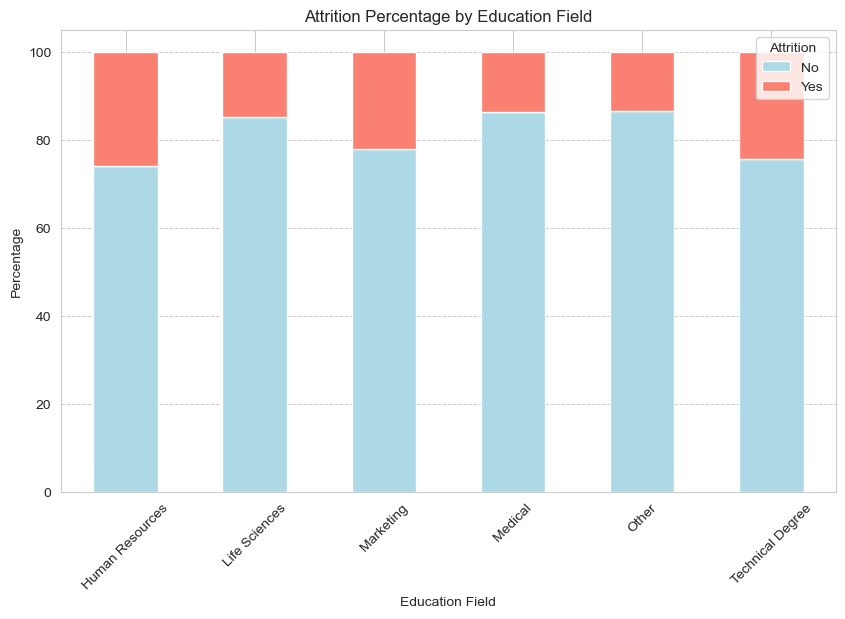

In [143]:
# Task 8: Attrition by Education Field
attrition_by_education = df_2.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_by_education.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Attrition Percentage by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

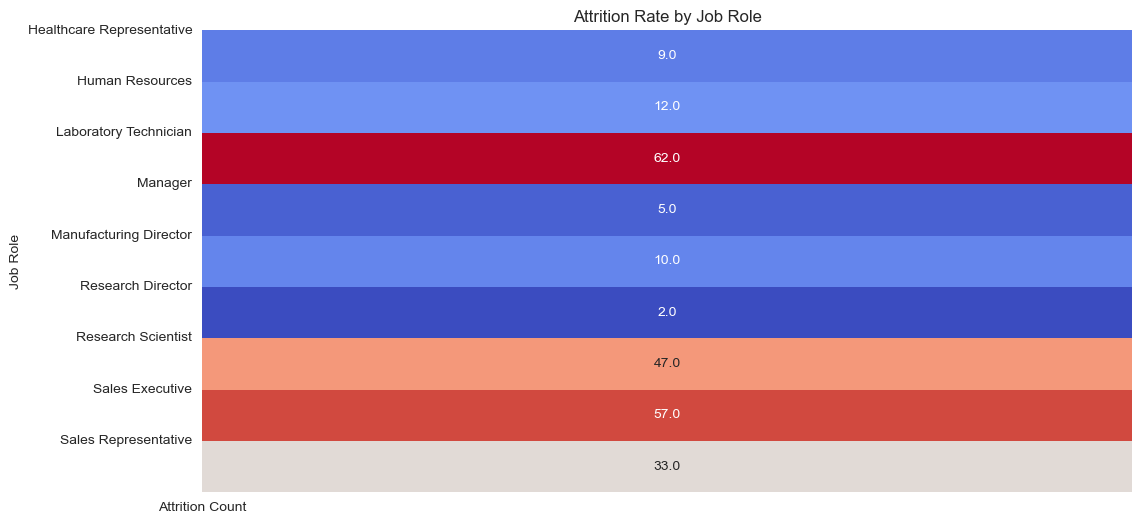

In [145]:
# Task 9: Attrition Rate by Job Role
attrition_rate_by_jobrole = df_2[df_2['Attrition'] == 'Yes'].groupby('JobRole')['Attrition'].count()
plt.figure(figsize=(12, 6))
sns.heatmap(attrition_rate_by_jobrole.values.reshape(-1, 1), annot=True, fmt=".1f", cmap='coolwarm', cbar=False)
plt.title('Attrition Rate by Job Role')
plt.ylabel('Job Role')
plt.xticks(ticks=[0], labels=['Attrition Count'])
plt.yticks(ticks=range(len(attrition_rate_by_jobrole)), labels=attrition_rate_by_jobrole.index, rotation=0)
plt.show()

# Key Conclusions






<span style="color: #3498db;">Age and Attrition</span>:
Younger employees, especially those under 35, tend to leave the company more frequently.
This suggests that this age group may be looking for dynamic opportunities or quicker career progression, which they may not feel is fully available within the company.

<span style="color: #e74c3c;">Attrition Rates by Department</span>:
Departments like Sales and Human Resources experience higher attrition compared to other departments like Research & Development.
This indicates that employees in these departments might face specific challenges or that they are more inclined to seek opportunities outside the company.

<span style="color: #2ecc71;">Overtime and Work-Life Balance</span>:
Employees who work overtime are significantly more likely to leave the company.
Improving work-life balance and reducing overtime hours could be key strategies for retaining employees.

<span style="color: #f39c12;">Job Satisfaction and Retention</span>:
Lower job satisfaction is strongly associated with higher attrition.
Focusing on improving satisfaction for roles with lower scores, such as Laboratory Technicians, can help retain staff.

<span style="color: #9b59b6;">Performance Ratings and Salary Hikes</span>:
Higher performance ratings lead to better salary hikes, which helps in retaining top performers.
Ensuring fair and transparent performance evaluations is crucial to maintaining employee motivation.

# Overall Recommendations


<span style="color: #3498db;">Focus on Retaining Younger Employees</span>: Implement mentorship programs, career development opportunities, and pathways for progression targeted at younger employees. This could help in keeping them engaged and reducing their likelihood of leaving.

<span style="color: #2ecc71;">Address Department-Specific Challenges</span>: Investigate the specific challenges faced by employees in Sales and Human Resources. This could involve conducting surveys or focus groups to better understand their needs and address concerns directly.

<span style="color: #9b59b6;">Ensure Fair Performance Reviews</span>: Maintain transparency in performance reviews and ensure that employees understand how salary hikes are determined. Recognizing and rewarding high-performing employees fairly will help in retaining talent.

<span style="color: #1abc9c;">Support Career Development for All Levels</span>: Offer career growth opportunities for junior employees, such as training, certifications, or internal mobility programs. This can help them see a long-term future with the company.

